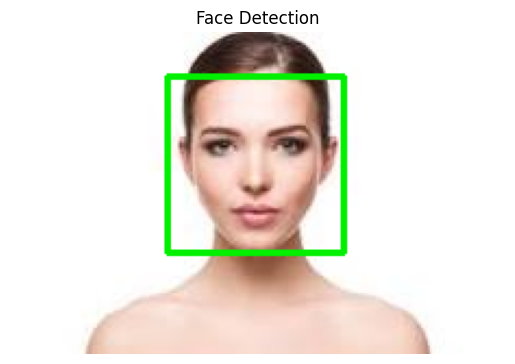

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image from file
img = cv2.imread('/content/face.jpeg')  # Change to the path of your image

if img is None:
    print("Error: Image not found. Please check the path.")
else:
    # Convert the image to grayscale for better performance
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image (scaleFactor and minNeighbors are parameters to adjust detection accuracy)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle with thickness of 2

    # Convert BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.title('Face Detection')
    plt.show()


In [ ]:
pip install tensorflow keras opencv-python numpy matplotlib deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=59485028b12e556d967acccd5a6bf1a7e3be8a6df00a10c1039aa3383b1a0057
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
import cv2
import numpy as np
from deepface import DeepFace

# Load pre-trained face detector (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Open webcam or video file
cap = cv2.VideoCapture(0)  # Use "video.mp4" instead of 0 for a video file

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

    for (x, y, w, h) in faces:
        # Extract face ROI
        face = frame[y:y+h, x:x+w]

        # Predict emotion using DeepFace
        try:
            result = DeepFace.analyze(face, actions=["emotion"], enforce_detection=False)
            emotion = result[0]['dominant_emotion']  # Get the dominant emotion

            # Draw bounding box around face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        except Exception as e:
            print("Error:", e)

    # Display the frame
    cv2.imshow("Face & Emotion Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



25-03-10 12:46:07 - Directory /root/.deepface has been created
25-03-10 12:46:07 - Directory /root/.deepface/weights has been created


In [ ]:
import cv2
from deepface import DeepFace

# Load image
image_path = "/content/PrivateTest_88305.jpg"
img = cv2.imread(image_path)
# Analyze emotions
result = DeepFace.analyze(img, actions=["emotion"], enforce_detection=False)
# Print the detected emotions
print(result)


[{'emotion': {'angry': 45.3850534787806, 'disgust': 9.18988062245991e-05, 'fear': 8.171010504425197, 'happy': 0.00015761793095375536, 'sad': 39.45587512587757, 'surprise': 4.019032884017487e-05, 'neutral': 6.987768828139831}, 'dominant_emotion': 'angry', 'region': {'x': 0, 'y': 0, 'w': 47, 'h': 47, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]


In [ ]:
# Load image
image_path = "/content/PrivateTest_647018.jpg"
img = cv2.imread(image_path)
# Analyze emotions
result = DeepFace.analyze(img, actions=["emotion"], enforce_detection=False)
# Print the detected emotions
print(result)

[{'emotion': {'angry': 2.2559488999096544e-09, 'disgust': 8.829528362792882e-12, 'fear': 1.0889140283909526e-09, 'happy': 99.99966621398926, 'sad': 3.6504571587769874e-08, 'surprise': 1.6214429972294386e-10, 'neutral': 0.0003370340664332616}, 'dominant_emotion': 'happy', 'region': {'x': 0, 'y': 0, 'w': 47, 'h': 47, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.93}]
